# Performing Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models. To be able to do so, some Data Wrangling is needed.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; 

- For example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. 

- <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.

- <code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

Next we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed and `0` means it was unsuccessful.

In [73]:
# Importing needed libraries

import pandas as pd
import numpy as np

In [74]:
# As a dataframe we will use the data that was loaded from SpaceX API
# Read the documentation how this data was loaded from notebook "Data_Collection_API.ipynb"

df = pd.read_csv("dataset_part_1.csv")

In [75]:
df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857


In [76]:
# This dataframe has 17 columns and 90 rows of data

df.shape

(90, 17)

In [77]:
# Identify and calculate the percentage of the missing values in each attribute
# From the result we remember that we left "LandingPad" missing values without filling intentionally

df.isnull().sum()/df.shape[0]*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [78]:
# Lets check the datatypes of each column in the dataframe

df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

We can see that the data contains several Space X launch facilities: 
- Cape Canaveral Space Launch Complex 40 VAFB SLC 4E, 
- Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), 
- Kennedy Space Center Launch Complex 39A KSC LC 39A

The location of each Launch Is placed in the column LaunchSite

In [79]:
# Let's see the number of launches for each site.

df["LaunchSite"].value_counts()

# CCSFS SLC 40    55 kpl: Vandenberg Air Force Base Space Launch Complex
# KSC LC 39A      22 kpl: Kennedy Space Center Launch Complex
# VAFB SLC 4E     13 kpl: Cape Canaveral Space Launch Complex

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [80]:
# Next lets see the number and occurence of each Orbit type

df["Orbit"].value_counts()

# GTO      27 --> 35,786 km
# ISS      21 --> low earth orbit
# VLEO     14 --> 450 km
# PO        9 --> ?
# LEO       7 --> 2,000 km
# SSO       5 --> ? 
# MEO       3 --> 20,000 km 
# ES-L1     1 
# HEO       1
# SO        1
# GEO       1 --> 35,786 km

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [81]:
# Then lets see the number and occurence of mission outcome per each orbit type

missio_outcome_per_orbit_type = df.groupby("Orbit")["Outcome"].value_counts()
missio_outcome_per_orbit_type

# We get the answer, but its a bit hard to read and understand well

Orbit  Outcome    
ES-L1  True Ocean      1
GEO    True ASDS       1
GTO    True ASDS      13
       None None      11
       False ASDS      1
       None ASDS       1
       True Ocean      1
HEO    True ASDS       1
ISS    True RTLS       7
       True ASDS       5
       None None       3
       False ASDS      2
       False Ocean     1
       False RTLS      1
       None ASDS       1
       True Ocean      1
LEO    True RTLS       4
       None None       2
       True Ocean      1
MEO    True ASDS       2
       None None       1
PO     True ASDS       5
       False ASDS      1
       False Ocean     1
       None None       1
       True Ocean      1
SO     None None       1
SSO    True RTLS       3
       True ASDS       2
VLEO   True ASDS      12
       False ASDS      2
Name: Outcome, dtype: int64

In [82]:
# This way of looking at the same question is not the best option either even though we get an rough idea allready

df["Outcome"].unique()

#array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       #'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

df["Orbit"].unique()

# array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       #'SO', 'GEO'], dtype=object)

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [83]:
# This is also one way of looking at the question in hand, but still not the best

landing_outcomes = df["Outcome"].value_counts()
landing_outcomes


True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [84]:
# Lets try to divide the outcomes to two different classes: successfull and not-successfull outcomes
# Lets start by numerating the unique outcome options

for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [85]:
# Lets create a set of only the not-successfull outcomes, and name this set as "bad_outcomes"

bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [86]:
# Lets create a new list: we can fill this list with outcomes (success and not-success) and use this list
# as a value for a key that we can later determine to be added to a new dataframe

landing_class_1 = []


In [87]:
# Lets go thrue our dataframe "df". We want to read the "Outcome" column and based on a values there
# insert a "1" or "0" to a empty list "landing_class_1"

for index, row in df.iterrows():
    if row["Outcome"] in bad_outcomes:
        landing_class_1.append(0)
    else:
        landing_class_1.append(1)

In [88]:
# Now we make a new column to our dataframe that has only "1" or "0" values telling us binary
# if Falcon 9 outcome was succesfull or not-succesfull

df_modified = df.copy() # Lets take a copy of the original dataframe

# And then add this new column to the modified dataframe

df_modified["LandingClass"] = landing_class_1

In [89]:
# See the new column and compare this dataframe to the dataframe that we started with

df_modified.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingClass
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,13,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,14,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,15,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,16,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,17,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [90]:
# This dataframe has 18 columns and 90 rows of data: one more column than the "df" dataframe

df_modified.shape

(90, 18)

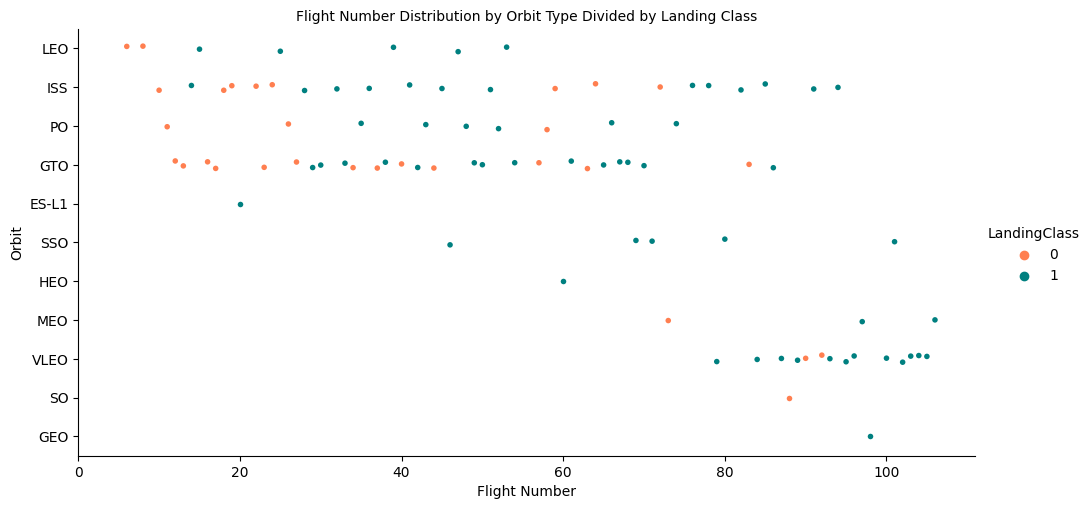

In [91]:
# Now we can more easily solve the question that we had in mind:
# The number and occurence of mission outcome per each orbit type

# Import the needed libraries

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Depending on the flight number and the orbit where Falcon 9 has been launched, the outcome of the landing varies.

# In the picture below, "1" LandingClass value means that the specific Falcon 9 rockets missions outcome was succefully
# landed to a specific region.

# LandingClass "0" on the other means the opposite: missions outcome was unsuccesfully landed to a specific region.

# In the picture we can see a categorical scatterplot which shows as the relationship between these three variable. 
# We can for example see that the heaviest launches have been successful regardless of the orbit. 
# We can also see that the first rocket launches were unsuccessfull. Only later SpaceX has been able to become successfull.

custom_palette = {0: "coral", 1: "teal"}
sns.catplot(y='Orbit', x='FlightNumber', hue='LandingClass', data=df_modified,kind='strip', aspect=2, size=4,palette=custom_palette)
plt.xlim(0)
plt.xlabel("Flight Number", fontsize=10)
plt.ylabel("Orbit", fontsize=10)
plt.title('Flight Number Distribution by Orbit Type Divided by Landing Class', fontsize=10)
plt.xticks(rotation=0)
plt.show()

In [92]:
# We can use the following line of code to determine the success rate of all the Falcon 9 launches so far:

df_modified["LandingClass"].mean()

# So Falcon 9 has landed successfully around 66% of the time

0.6666666666666666

Finally we can save this modified dataframe to a CSV file for later use

In [93]:
df_modified.to_csv("dataset_part_2.csv", index=False)